# Gold and Gains

Does gold outperform on certain days of the week ?  This notebook explores that quesiton.  

By Fred Etter - August, 2019

Import modules and libraries:

In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.cluster import MeanShift, estimate_bandwidth
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
%matplotlib inline

Read in the gold data.  This data comes from the Federal Reserve Bank of St. Louis:

In [2]:
# read in all of the local csv files into pandas:
df = pd.read_csv('gold.csv')

# Convert price to a number, with coersion to throw NA's if conversion not possible
df['price'] = pd.to_numeric(df['GOLDAMGBD229NLBM'], errors='coerce')

# Remove NA's
df.dropna(inplace=True)

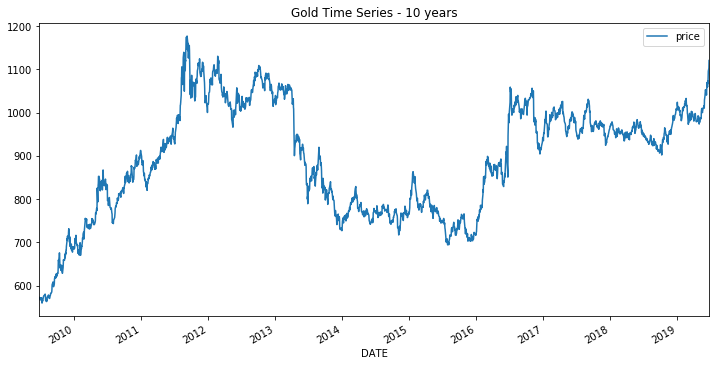

In [3]:
df.index = pd.to_datetime(df.DATE)
df.plot(figsize=(12, 6))
plt.title('Gold Time Series - 10 years')
plt.show()

The above plot shows the bull market from late 2009 to June of 2019.  Notice that the chart does not have an absolute zero in this case (it is not necessary).  Next, add some columns to perform more analysis:

In [4]:
# Create a column in the dataframe that is a datetime object
df['date_time'] = pd.to_datetime(df['DATE'])

# Create more columns to separate the weekday
df['weekday'] = df.date_time.dt.weekday
df['day'] = df.date_time.dt.day
df['month'] = df.date_time.dt.month
df['year'] = df.date_time.dt.year

Add a column for the change in price for each day:

In [5]:
# add a column for the change in price each day
df['change'] = df.price - df.price.shift()

Display a histogram to show the distribution of daily price changes for gold:

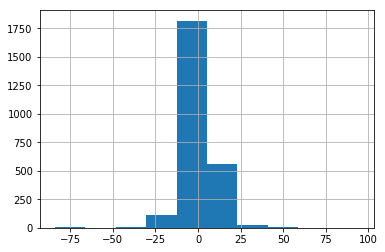

In [6]:
df.change.hist()

Looks fairly normally distributed which one of the requirements for performing parametric statistical tests. Next, sum the total change for each day of the week for gold over the past 10 years to see the cumulative return for each day:

In [7]:
# For Gold - last 10 years
# 0 is Monday, 1 is Tuesday, etc
print(df.loc[df['weekday'] == 0, 'change'].sum())
print(df.loc[df['weekday'] == 1, 'change'].sum())
print(df.loc[df['weekday'] == 2, 'change'].sum())
print(df.loc[df['weekday'] == 3, 'change'].sum())
print(df.loc[df['weekday'] == 4, 'change'].sum())

538.5429999999996
415.8369999999994
-40.4830000000004
-459.0160000000003
93.1730000000016


As shown above, Mondays recorded the most gain while Thursday performed the worst.  **Modays gained a total of 539 points while Thursdays lost 459 points.**  The question becomes:  Is this change significant ?  Are these differences meaningful or were they caused by random chance ?  One way to test for significance is to execute a t-test.  A t-test requires the mean of the sample, the variance of the sample and the number of datapoints in each of the two samples to determine significance.  If the p-value is less than 0.05 then one can conclude that the samples are significantly different - in other words, the samples came from two different populations.  In this case the two different populations would be all of the price change values of Mondays and Thursdays.  See the t-test calculation in the next cell:

In [8]:
# T-test for Mondays vs. Thursdays
print(ttest_ind(df.change.where(df.weekday == 0).dropna(), df.change.where(df.weekday == 3).dropna()))

Ttest_indResult(statistic=3.3440189329939844, pvalue=0.0008567701430384474)


So, the **p-value is 0.0009** - which definitely shows a significant difference.  The total return on Mondays vs. Thursdays were definitely not coming from the same population.  (or at least there is a 0.09% chance that the values came from the same population)  Next, calculate the average change per day for all days and then calculate the average change per day for each of the days of week independently:

In [9]:
# Average change per day for gold over the past 10 years:
print(df.change.mean())

0.2171370839936608


Above is the average price change per day.  Display the average price change for each day of the week:

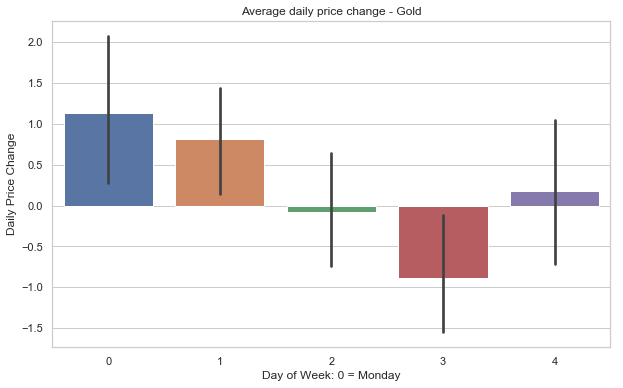

In [10]:
# suppress warning messages
import warnings
warnings.filterwarnings('ignore')

# Set up barplot
sns.set(style="whitegrid", rc={'figure.figsize':(10, 6)})
sns.barplot(x='weekday', y='change', ci=95, data=df)
plt.xlabel('Day of Week: 0 = Monday')
plt.ylabel('Daily Price Change')
plt.title('Average daily price change - Gold')
plt.show()

From the barplot above, the range of the mean value of Monday vs Thursday do not overlap at all within a confidence interval of 95%.  This further supports a definite difference in price action between Mondays and Thursdays.  So, does this mean that someone could have been buying gold towards the end of the day on Thursday and then selling it towards the end of the day on Monday over the last 10 years to make a nice profit ??  Well, probably yes.  However, there is a chance that the transaction costs could have eaten into the profitability, but it seems very likely that this would have been a profitable strategy if executed over the past 10 years.  The next question is:  Could one start doing this strategy now, today, and count on a solid profit ?  This is a little trickier.  

First, the financial disclaimers endlessly preached whenever dealing with financial forecasting are applicable here:

- “Past performance is no guarantee of future results.” The Securities and Exchange Commission (SEC) requires that mutual funds tell investors that a fund's past performance does not necessarily predict future results in their advertising.
- DISCLAIMER: Please  remember  that  past  performance  may not  be  indicative  of  future  results.  Different  types  of investments involve varying degrees of risk, and there can be no assurance that the future performance of any specific investment, investment strategy, or product made reference to directly or indirectly in this newsletter (article), will be profitable, equal any corresponding indicated historical performance level(s), or be suitable for your portfolio. 

So, where to go from here ?  Running a back test with applicable exchange and/or trading fees might help get a better picture.  But even before this step, check out the following quick analysis to try to replicate these results with **just the past 5 years of gold data.**  If this strategy is a valid one, perhaps the past 5 years would also show Mondays significantly outperforming Thursdays....

#### Gold over the past 5 years:

In [11]:
# read in all of the local csv files into pandas:
df = pd.read_csv('gold_new.csv')

# Convert price to a number, with coersion to throw NA's if conversion not possible
df['price'] = pd.to_numeric(df['GOLDAMGBD228NLBM'], errors='coerce')

# Remove NA's
df.dropna(inplace=True)

Plot it:

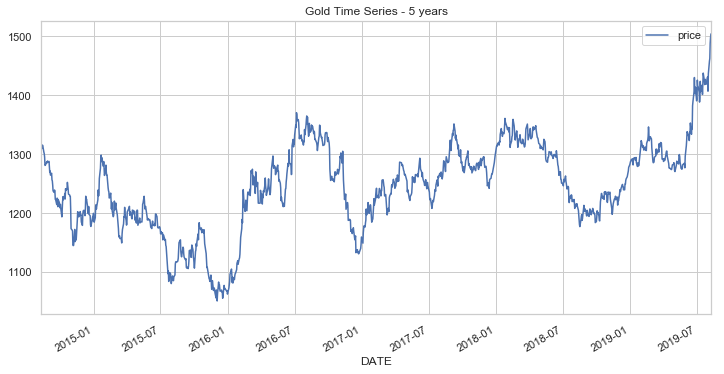

In [12]:
df.index = pd.to_datetime(df.DATE)
df.plot(figsize=(12, 6))
plt.title('Gold Time Series - 5 years')
plt.show()

Separate date and days of the week:

In [13]:
# Gold
df['date_time'] = pd.to_datetime(df['DATE'])

df['weekday'] = df.date_time.dt.weekday
df['day'] = df.date_time.dt.day
df['month'] = df.date_time.dt.month
df['year'] = df.date_time.dt.year

Add a column for the change in price for each day:

In [14]:
# add a column for the change in price each day
df['change'] = df.price - df.price.shift()

Sum the total change for each day of the week for gold to see the cumulative return for each day:

In [15]:
# Cumulative return for each day of the week for gold over the past 5 years:
print(df.loc[df['weekday'] == 0, 'change'].sum())
print(df.loc[df['weekday'] == 1, 'change'].sum())
print(df.loc[df['weekday'] == 2, 'change'].sum())
print(df.loc[df['weekday'] == 3, 'change'].sum())
print(df.loc[df['weekday'] == 4, 'change'].sum())

4.649999999999409
170.900000000001
31.299999999999272
24.999999999998863
-36.599999999998545


Uh oh...  The above data shows that Tuesdays were the strongest performing days while Fridays were the worst over the **past 5 years**.  No need to even back test at this point.  Run a quick t-test for this 5 year data:

In [16]:
print(ttest_ind(df.change.where(df.weekday == 1).dropna(), df.change.where(df.weekday == 4).dropna()))

Ttest_indResult(statistic=1.00555369767054, pvalue=0.3151099719347955)


The pvalue above is about 0.32 which is much too high to validate a significant difference between the two days of the week.  It must be assumed that the difference is due to random chance.  Next, again, calculate the average daily return for the past 5 years and the average return for each day of the week:

In [17]:
print(df.change.mean())

0.15459224069675376


The average value is a gain of 0.15 points over the past 5 years.

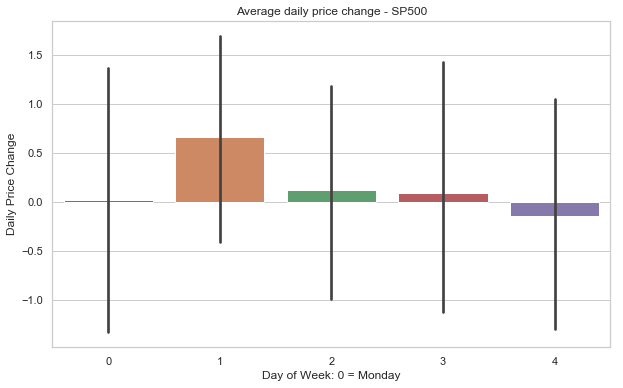

In [18]:
sns.set(style="whitegrid", rc={'figure.figsize':(10, 6)})
sns.barplot(x='weekday', y='change', ci=95, data=df)
plt.xlabel('Day of Week: 0 = Monday')
plt.ylabel('Daily Price Change')
plt.title('Average daily price change - SP500')
plt.show()

As seen above, the mean values with 95% confidence overlap significantly between Tuesday and Friday (as well as every other day).

# Conclusion:  

While the difference between the cumulative returns on Mondays vs Thursdays over the past 10 years are definitely significant, that same statistical difference evaporates over just the past 5 years.  

There could have been many reasons why Mondays performed so much better than Thursdays over the past 10 years.  Maybe an industry report came out every Monday starting 15 years ago and the same report ceased to exist 5 years ago, for example.  Or maybe stocks use to perform worse on Mondays 10 years ago and traders / investors hedged their positions with a bullish position in gold.  The possibilities are endless as to why the difference over 10 years exists.  **The main conclusion here is that the signigicant difference of Mondays vs Thursday over the past 10 years does not necessarily hold true in the future.**  